In [2]:
import tensorflow as tf
#MNIST手写数字数据集，6W个样本，1W个测试集
#softmax函数
import numpy as np
import matplotlib.pyplot as plt
#3-1 非线性回归

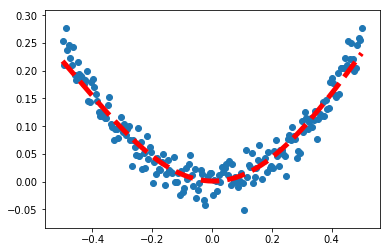

In [13]:
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r--',lw=5)
    plt.show()  

In [ ]:
#3-2 手写数字识别
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_dataput_data

In [38]:
#载入数据集
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

#每个批次的大小
batch_size = 100 # 
#计算一共有多少个批次
n_batch = mnist.train.num_examples # batch_size

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

#创建一个简单的神经网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

#初始化设置
init = tf.global_variables_initializer()

#结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))#argmac返回一维张量中最大的值所在的位置
#求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print("Iter"  + str(epoch) + ",Testing Accuracy" + str(acc))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter0,Testing Accuracy0.9262
Iter1,Testing Accuracy0.9297
Iter2,Testing Accuracy0.9303
Iter3,Testing Accuracy0.9305
Iter4,Testing Accuracy0.9307
Iter5,Testing Accuracy0.9309
Iter6,Testing Accuracy0.9311
Iter7,Testing Accuracy0.9311
Iter8,Testing Accuracy0.9304
Iter9,Testing Accuracy0.9305
Iter10,Testing Accuracy0.9299
Iter11,Testing Accuracy0.9296
Iter12,Testing Accuracy0.9297
Iter13,Testing Accuracy0.9302
Iter14,Testing Accuracy0.93
Iter15,Testing Accuracy0.9301
Iter16,Testing Accuracy0.93
Iter17,Testing Accuracy0.931
Iter18,Testing Accuracy0.9311
Iter19,Testing Accuracy0.9317
Iter20,Testing Accuracy0.9315
